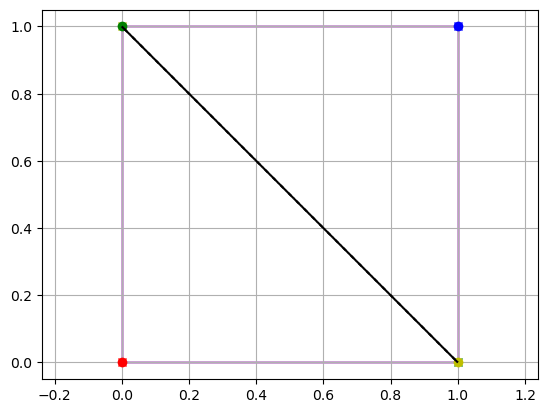

In [64]:
import matplotlib.pyplot as plt

# identity matrix (does nothing)
# transform_matrix = [[1, 0], [0, 1]]

#transform_matrix = [[1, 0], [0.5, 1]]

# to rotate the image theta degrees
import numpy as np

theta = 50
theta_rad = np.radians(theta)

# rotate the image theta degrees:
# [ cos(theta) -sin(theta) ]
# [ sin(theta)  cos(theta) ]
#transform_matrix = [[np.cos(theta_rad), -np.sin(theta_rad)], [np.sin(theta_rad), np.cos(theta_rad)]]

# to flip the image over the y = x
# [ 0 1 ]
# [ 1 0 ]
transform_matrix = [[0, 1], [1, 0]]

points = [[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]

# this function should add different transformations together
def compose_transforms(t1, t2):
    res = [[0, 0], [0, 0]]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                res[i][j] += t1[i][k] * t2[k][j]
    return res

# when composing transformations, the order matters
# for example:
# t1 = [[0, 1], [1, 0]] # flip over y=x
# t2 = [[1, 0.8], [0, 1]] # shear
# t1 x t2 will shear the image and then flip it over y=x
# it goes from right to left
# when composing more than 2 transformations, the order still matters
# t1 x t2 x t3 will apply t3 first, then t2, then t1 
# ? the operation is equivalent to t1(t2(t3(x)))

# this will flip the image over y=x and then over x
#transform_matrix = compose_transforms(transform_matrix, [[0, 1], [1, 0]])

def transform_point(p, t_mat):
    p_mat = [[p[0]], [p[1]]]
    res = [[0], [0]]
    for i in range(2):
        for j in range(2):
            res[i][0] += t_mat[i][j] * p_mat[j][0]
    
    #return res
    return [res[0][0], res[1][0]]

# this is the important stuff ^^^^

# flip diagonally over y=x
# print(transform_point([2, 1], [[0, 1], [1, 0]]))

colors_1 = ['rx', 'gx', 'bx', 'yx', 'cx']
colors_2 = ['ro', 'go', 'bo', 'yo', 'co']

fig = plt.figure()

# this tripped me up for a while. make sure the aspect ratio is equal
plt.axis('equal')
plt.grid(True)

# Plot the original points
for i in range(len(points) - 1):
    plt.plot(points[i][0], points[i][1], colors_1[i], label=f'p {i}')

# Transform the points
transformed_points = [transform_point(p, transform_matrix) for p in points]

# Plot the transformed points
for i in range(len(transformed_points) - 1):
    plt.plot(transformed_points[i][0], transformed_points[i][1], colors_2[i], label=f'p\' {i}')

# Connect the original points to the transformed points
for i in range(len(points)):
    plt.plot([points[i][0], transformed_points[i][0]], [points[i][1], transformed_points[i][1]], 'k--')

# Connect each point to form a polygon
original_polygon = plt.Polygon(points, closed=True, fill=None, edgecolor='r')
transformed_polygon = plt.Polygon(transformed_points, closed=True, fill=None, edgecolor='b')
plt.gca().add_patch(original_polygon)
plt.gca().add_patch(transformed_polygon)



# show labels on points
# for i in range(len(points) - 1):
#     plt.text(points[i][0], points[i][1], f'p\' {i}')

plt.show()

In [ ]:
# this will be the same thing but using numpy

import numpy as np

points = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

def transform_point(p, t_mat):
    return np.dot(t_mat, p)




# Mapping p(x,y) to p'(x,y)
## this might be a load of crap
p'(x) = a*p(x) + b*p(y)
p'(y) = c*p(x) + d*p(y)

where a,b,c,d are constants.

we need to find a,b,c,d such that p'(x) and p'(y) are independent and map back to p(x) and p(y) when we apply the inverse transformation.

the inverse transformation is given by:

p(x) = A*p'(x) + B*p'(y)
p(y) = C*p'(x) + D*p'(y)

where A,B,C,D are constants. 
A,B,C,D can be found by solving the following equations:

$A = \frac{d}{ad-bc}$
$B = \frac{-b}{ad-bc}$
$C = \frac{-c}{ad-bc}$
$D = \frac{a}{ad-bc}$

# Proof

p(x) = A*p'(x) + B*p'(y)
p(y) = C*p'(x) + D*p'(y)




how to do it to images:

def transform(point, t_mat) -> new_point:

    new_point = np.dot(t_mat, point)
    return new_point

def make_new_image(img, t_mat):
    # make a copy of the image
    # i dont know how i can create the new image if some of the points are outside the image

    new_img = np.zeros_like(img)
    for rows in range(img.shape[0]):
        for cols in range(img.shape[1]):
            new_coords = transform([rows, cols], t_mat)
            new_img[new_coords[0], new_coords[1]] = img[rows, cols]
    return new_img

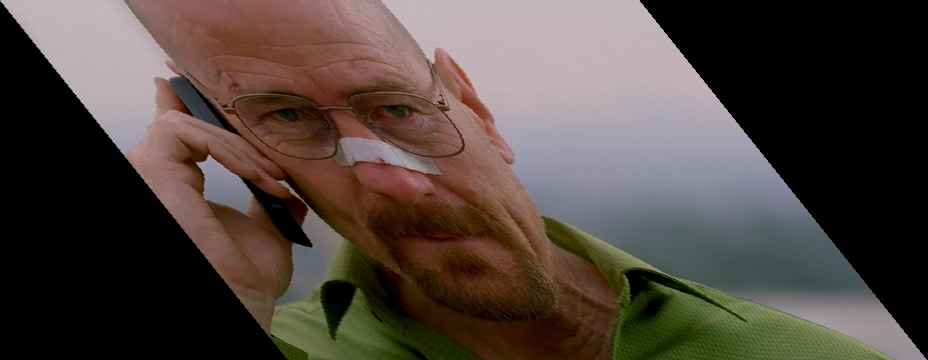

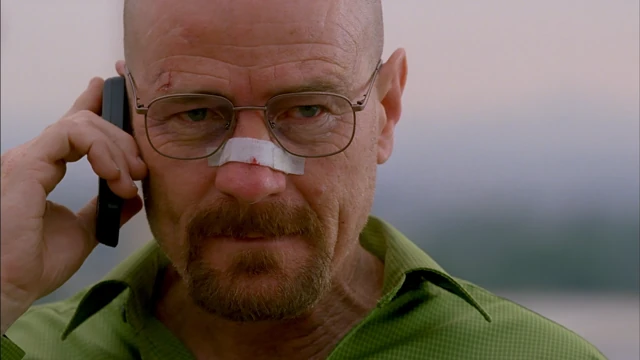

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image

transform_matrix = [[1, 0], [0.8, 1]]

#rotate the image 50 degrees
#theta = 30
#theta_rad = np.radians(theta)
#transform_matrix = [[np.cos(theta_rad), -np.sin(theta_rad)], [np.sin(theta_rad), np.cos(theta_rad)]]

img = Image.open('walt.png')
img = np.array(img)

def transform_point(p, t_mat):
    return np.dot(t_mat, p)

# maybe upscale the image first 
# then apply the transformation
# then crop the image

def find_new_img_size(img, t_mat):
    corners = np.array([[0, 0], [0, img.shape[1]], [img.shape[0], 0], [img.shape[0], img.shape[1]]])
    new_corners = np.array([transform_point(c, t_mat) for c in corners])
    min_x = np.min(new_corners[:, 0])
    max_x = np.max(new_corners[:, 0])
    min_y = np.min(new_corners[:, 1])
    max_y = np.max(new_corners[:, 1])
    return (int(max_x - min_x), int(max_y - min_y))

def make_new_image(img, t_mat):
    #new_img = np.zeros_like(img)
    new_size = find_new_img_size(img, t_mat)
    
    new_img = np.zeros([new_size[0], new_size[1], 3], dtype=np.uint8)
    # upscale the original image
    

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_coords = transform_point([i, j], t_mat)
            new_img[int(new_coords[0]), int(new_coords[1])] = img[i, j]

    return new_img

display(Image.fromarray(make_new_image(img, transform_matrix)))
display(Image.fromarray(img))